In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./pitcher_salary_current&predict.csv')
df

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
1,7,김명신,두산,3.52,16,0,1,0,0,0.000,...,0,2,0,0,0,0,2020,5200.0,0.29,4500.0
2,8,김강률,두산,3.54,30,2,2,0,0,0.500,...,2,0,1,0,0,0,2020,15000.0,-0.37,11000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
609,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
610,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
611,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [4]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉'],
      dtype='object')

In [3]:
df_c = df.copy()

In [5]:
df_c = df_c.query('IP > 32')

In [6]:
df_c

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,4,5,1,1,0,2020,21000.0,0.41,15600.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2,0,2,1,0,2020,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
609,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
610,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
611,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [7]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉'],
      dtype='object')

In [8]:
df.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,12.748777,4.503719,34.508972,3.632953,3.548124,1.913540,4.292007,0.466253,62.823817,22.039804,...,0.929853,2.967374,2.225122,1.001631,2.856444,0.212072,2021.539967,18163.197390,1.123263,20275.856444
std,6.515606,1.666859,18.548964,3.659622,2.963788,6.196723,6.480329,0.294767,45.565527,38.912967,...,1.120212,2.374754,1.910982,1.296676,2.810277,0.508796,1.117501,40061.917473,1.629473,27917.109346
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,3000.000000
25%,7.000000,3.380000,21.000000,1.000000,1.000000,0.000000,0.000000,0.273000,31.000000,0.300000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2021.000000,4000.000000,0.020000,5600.000000
50%,13.000000,4.300000,30.000000,3.000000,3.000000,0.000000,1.000000,0.500000,50.000000,0.600000,...,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2022.000000,8500.000000,0.530000,10200.000000
75%,18.000000,5.320000,50.000000,5.000000,5.000000,0.000000,7.000000,0.647000,76.000000,33.000000,...,1.000000,4.000000,3.000000,1.000000,4.000000,0.000000,2023.000000,17000.000000,1.650000,20000.000000
max,25.000000,12.560000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.450000,200000.000000


In [79]:
df_1 = df_c[['ERA', 'W', 'IP', 'WHIP', 'AVG','QS', 'WAR', 'NP','연봉']]
df_1['SO/BB'] = df_c['SO'] / df_c['BB']
df_1['NP/IP'] = df_c['NP'] / df_c['IP']
df_1['RA9'] = (df_c['R'] / df_c['IP']) * 9
df_1['RA9-WAR'] = df_1['RA9'] - df_1['WAR']
df_1_corr = df_1.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_3328\4115915137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['SO/BB'] = df_c['SO'] / df_c['BB']
C:\Users\user\AppData\Local\Temp\ipykernel_3328\4115915137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['NP/IP'] = df_c['NP'] / df_c['IP']
C:\Users\user\AppData\Local\Temp\ipykernel_3328\4115915137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


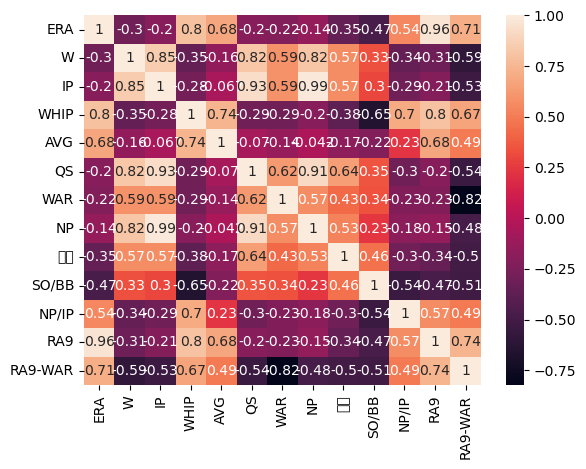

In [80]:
sns.heatmap(df_1_corr, annot = True)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns
vif.round(1)

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,161.2,ERA
1,10.4,W
2,591.2,IP
3,450.1,WHIP
4,241.3,AVG
5,14.5,QS
6,inf,WAR
7,500.0,NP
8,3.4,연봉
9,17.6,SO/BB


In [3]:
df_ago = pd.read_csv('./pitcher_salary_current&predict.csv')
df_ago

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
1,7,김명신,두산,3.52,16,0,1,0,0,0.000,...,0,2,0,0,0,0,2020,5200.0,0.29,4500.0
2,8,김강률,두산,3.54,30,2,2,0,0,0.500,...,2,0,1,0,0,0,2020,15000.0,-0.37,11000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
609,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
610,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
611,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [4]:
df_ago.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉'],
      dtype='object')

In [5]:
df_ago_c = df_ago.copy()

In [6]:
df_ago_c = df_ago_c.query('IP > 32')

In [7]:
df_ago_c.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,...,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,11.587973,4.163541,40.400891,4.614699,4.427617,2.554566,5.307350,0.485755,78.603563,27.226058,...,1.113586,3.657016,2.699332,1.198218,3.443207,0.267261,2021.550111,21646.636971,1.516080,25044.988864
std,6.010923,1.306852,17.391490,3.776201,2.962525,7.118091,7.180639,0.239608,43.358798,43.814986,...,1.183223,2.306426,1.948219,1.375291,2.945488,0.562855,1.125122,45365.778220,1.737802,30867.983045
min,1.000000,1.480000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,3000.000000
25%,7.000000,3.270000,26.000000,2.000000,2.000000,0.000000,0.000000,0.333000,47.000000,0.300000,...,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2021.000000,5200.000000,0.280000,8000.000000
50%,11.000000,4.010000,39.000000,4.000000,4.000000,0.000000,2.000000,0.500000,61.000000,0.600000,...,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,2022.000000,10000.000000,0.950000,14000.000000
75%,16.000000,4.980000,56.000000,6.000000,6.000000,1.000000,9.000000,0.625000,104.000000,49.000000,...,2.000000,5.000000,4.000000,2.000000,5.000000,0.000000,2023.000000,22000.000000,2.320000,25200.000000
max,25.000000,10.760000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.450000,200000.000000


In [13]:
df_ago_c['K/9'] = (df_ago_c['SO'] / df_ago_c['IP']) * 9

In [19]:
df_ago_c['BB/9'] = (df_ago_c['BB'] / df_ago_c['IP']) * 9
df_ago_c['K-BB'] = df_ago_c['K/9'] - df_ago_c['BB/9']

In [38]:
df_ago_c['선수명'].duplicated().sum()

241

In [47]:
df_ago_corr = df_ago_c[['W', 'ERA', 'QS', 'IP', 'WHIP', 'WAR_x', 'G','TBF','현재연봉', '예측연봉']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from curr

<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: 

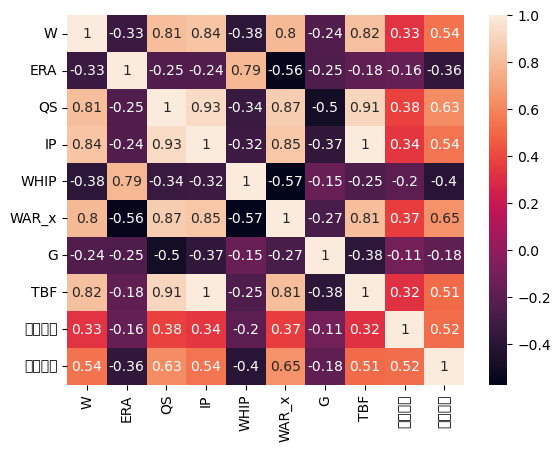

In [48]:
sns.heatmap(df_ago_corr, annot = True)

In [42]:
X = df_ago_c[['W','ERA','QS', 'IP', 'WHIP', 'WAR_x','현재연봉']].to_numpy()
y = df_ago_c['예측연봉'].to_numpy()

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

# 학습 데이터와 테스트 데이터로 분리하기

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
ss_x = StandardScaler()
ss_y = StandardScaler()

X_scaled = ss_x.fit_transform(X_train)
y_scaled = ss_y.fit_transform(y_train)
scaled_X = ss_x.transform(X_test)
scaled_y = ss_y.transform(y_test)

In [44]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test))

0.5240980191171775
0.7000031001552564


In [26]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행한다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     67.40
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           2.58e-49
Time:                        09:28:46   Log-Likelihood:                -4119.7
No. Observations:                 359   AIC:                             8251.
Df Residuals:                     353   BIC:                             8275.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.277e+04   4386.906      5.190      0.000    1.41e+04    3.14e+04
x1           820.5706    610.618      1.344      0.180    -380.337    2021.478
x2          3692.5816    590.963      6.248      0.000    2530.331    4854.832
x3           -22.3562     14.079     -1.588      0.113     -50.045       5.332
x4           138.9607    266.353      0.522      0.602    -384.878     662.799
x5             0.2022      0.028      7.318      0.000       0.148       0.257
==============================================================================
Omnibus:                      207.755   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2957.807
Skew:                           2.109   Prob(JB):                         0.00
Kurtosis:                      16.414   Cond. No.                     1.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""